In [81]:

### Load all necessary packages and settings. Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(RColorBrewer)

In [107]:
#read the data from the web using its url
#renaming columns based off website's names
processed_cleveland <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                                col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                         "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                                col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f", "f", "d"))

processed_va <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                         col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                      "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                         col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f", "f", "d"))

# Displaying the first few rows of processed_cleveland and processed_va dataset
head(processed_cleveland)
head(processed_va)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
63,1,4,140,260,0,1,112,1,3.0,2,?,?,2
44,1,4,130,209,0,1,127,0,0.0,NA,?,?,0
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [108]:
#setting seed so our data analysis can be reproducible in the future
set.seed(5)
#changing ? cell values to NA
processed_cleveland [ processed_cleveland == "?" ] <- NA
processed_va [ processed_va == "?" ] <- NA

In [186]:

#selecting class all predictor columns

# selected cleveland data
cleveland_selected <- processed_cleveland |>
    select(age, trestbps, chol, oldpeak, thalach, num) 
   
# selected va data
va_selected <- processed_va |>
    select(age, trestbps, chol, oldpeak, thalach, num) 
    
# Display cleveland data and va data
head(cleveland_selected)
head(va_selected)


age,trestbps,chol,oldpeak,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,145,233,2.3,150,0
67,160,286,1.5,108,2
67,120,229,2.6,129,1
37,130,250,3.5,187,0
41,130,204,1.4,172,0
56,120,236,0.8,178,0


age,trestbps,chol,oldpeak,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,140,260,3.0,112,2
44,130,209,0.0,127,0
60,132,218,1.5,140,2
55,142,228,2.5,149,1
66,110,213,1.3,99,0
66,120,0,-0.5,120,0


In [188]:
#clean and wrangling data 

#splitting dataframe into training, testing datasets
cleveland_split <- initial_split(processed_cleveland, prop = 3/4, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

glimpse(cleveland_training)

#splitting dataframe into training, testing datasets
va_split <- initial_split(processed_va, prop = 3/4, strata = num)
va_training <- training(va_split)
va_testing <- testing(va_split)

glimpse(va_training)

Rows: 226
Columns: 14
$ age      <dbl> 63, 37, 41, 56, 57, 56, 44, 57, 48, 49, 58, 50, 58, 66, 69, 5…
$ sex      <dbl> 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0…
$ cp       <dbl> 1, 3, 2, 2, 4, 2, 2, 3, 3, 2, 1, 3, 3, 1, 1, 4, 3, 4, 3, 1, 2…
$ trestbps <dbl> 145, 130, 130, 120, 140, 140, 120, 150, 130, 130, 150, 120, 1…
$ chol     <dbl> 233, 250, 204, 236, 192, 294, 263, 168, 275, 266, 283, 219, 3…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0…
$ restecg  <dbl> 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ thalach  <dbl> 150, 187, 172, 178, 148, 153, 173, 174, 139, 171, 162, 158, 1…
$ exang    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.4, 1.3, 0.0, 1.6, 0.2, 0.6, 1.0, 1.6, 0…
$ slope    <dbl> 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1…
$ ca       <fct> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0…
$ thal     <fct> 6

In [193]:
#Mutated clean dataset that produces true if num > 0, false if num = 0
#true if num = 1,2,3,4 if they have heart disease
cleveland_tf <- cleveland_data |>
                    mutate(diag = ifelse(is.na(num), NA, (num > 0))) |>
                    mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
                           fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
                           exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
                           ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope)))
cleveland_tf

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,1,1,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,2,2,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,3,3,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,1,2,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,1,2,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,1,2,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,3,2,3,TRUE
57,0,4,120,354,0,0,163,1,0.6,1,1,2,0,FALSE
63,1,4,130,254,0,2,147,0,1.4,2,4,3,2,TRUE


In [190]:
#finding max and min values per num for our variables 
#(age, trestbps, chol, thalach, oldpeak) of cleveland dataset
mean_cleveland_training<- cleveland_training |>
    group_by(num) |>
    summarize(max_age = max(age, na.rm = TRUE),
             max_trestbps = max(trestbps, na.rm = TRUE),
             max_chol = max(chol, na.rm = TRUE),
             max_oldpeak = max(oldpeak, na.rm = TRUE),
             max_thalach = max(thalach, na.rm = TRUE),
             min_age = min(age, na.rm = TRUE),
             min_trestbps = min(trestbps, na.rm = TRUE),
             min_chol = min(chol, na.rm = TRUE),
             min_oldpeak = min(oldpeak, na.rm = TRUE),
             min_thalach = min(thalach, na.rm = TRUE))|>
             pivot_longer(cols = -num,
                 names_to = 'cleveland_max_min',
                 values_to = 'Value') 
mean_cleveland_training

#finding max and min values per num for our variables 
#(age, trestbps, chol, thalach, oldpeak) of va long beach dataset
mean_va_training<- va_training |>
    group_by(num) |>
    summarize(max_age = max(age, na.rm = TRUE),
             max_trestbps = max(trestbps, na.rm = TRUE),
             max_chol = max(chol, na.rm = TRUE),
             max_oldpeak = max(oldpeak, na.rm = TRUE),
             max_thalach = max(thalach, na.rm = TRUE),
             min_age = min(age, na.rm = TRUE),
             min_trestbps = min(trestbps, na.rm = TRUE),
             min_chol = min(chol, na.rm = TRUE),
             min_oldpeak = min(oldpeak, na.rm = TRUE),
             min_thalach = min(thalach, na.rm = TRUE))|>
             pivot_longer(cols = -num,
                 names_to = 'va_max_min',
                 values_to = 'Value') 
mean_va_training

num,cleveland_max_min,Value
<dbl>,<chr>,<dbl>
0,max_age,76.0
0,max_trestbps,178.0
0,max_chol,564.0
0,max_oldpeak,4.2
0,max_thalach,202.0
0,min_age,29.0
0,min_trestbps,94.0
0,min_chol,126.0
0,min_oldpeak,0.0


num,va_max_min,Value
<dbl>,<chr>,<dbl>
0,max_age,75.0
0,max_trestbps,180.0
0,max_chol,458.0
0,max_oldpeak,2.0
0,max_thalach,180.0
0,min_age,35.0
0,min_trestbps,100.0
0,min_chol,0.0
0,min_oldpeak,-0.5


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
37,1,3,130,250,0,0,187,0,3.5,3,1,2,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,1,2,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,1,2,0,FALSE
57,0,4,120,354,0,0,163,1,0.6,1,1,2,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,1,1,0,FALSE
44,1,2,120,263,0,0,173,0,0.0,1,1,3,0,FALSE
52,1,3,172,199,1,0,162,0,0.5,1,1,3,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,1,2,0,FALSE
54,1,4,140,239,0,0,160,0,1.2,1,1,2,0,FALSE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 39 rows containing non-finite values (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 38 rows containing non-finite values (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 36 rows containing non-finite values (`stat_bin()`).”


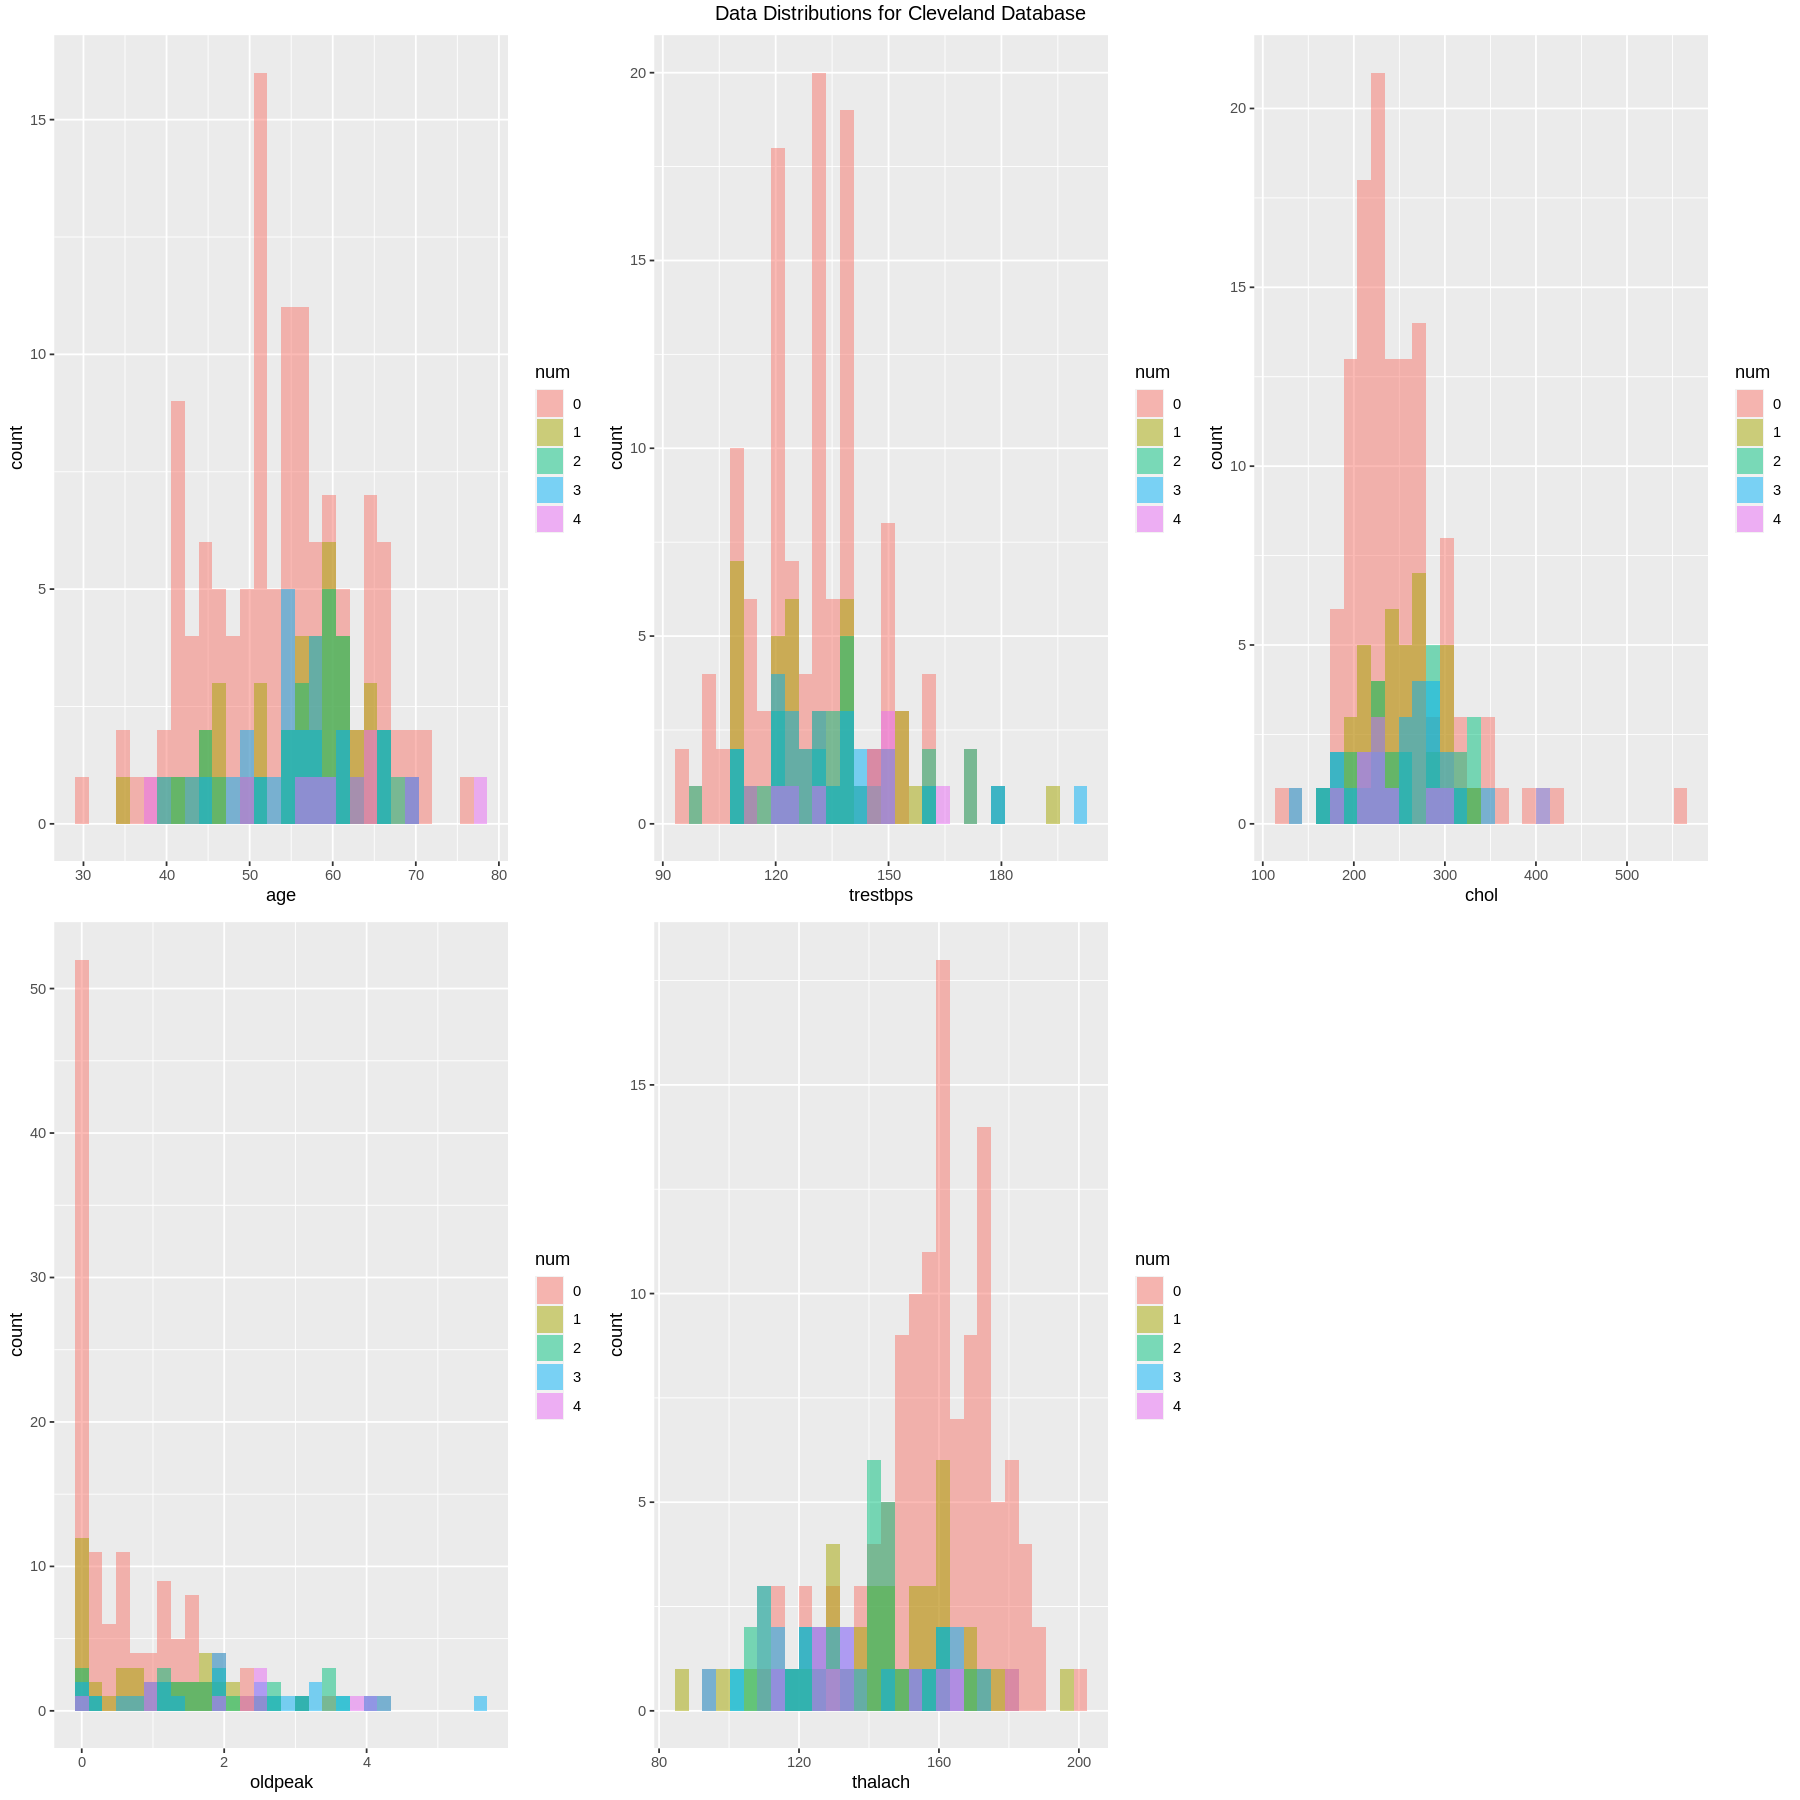

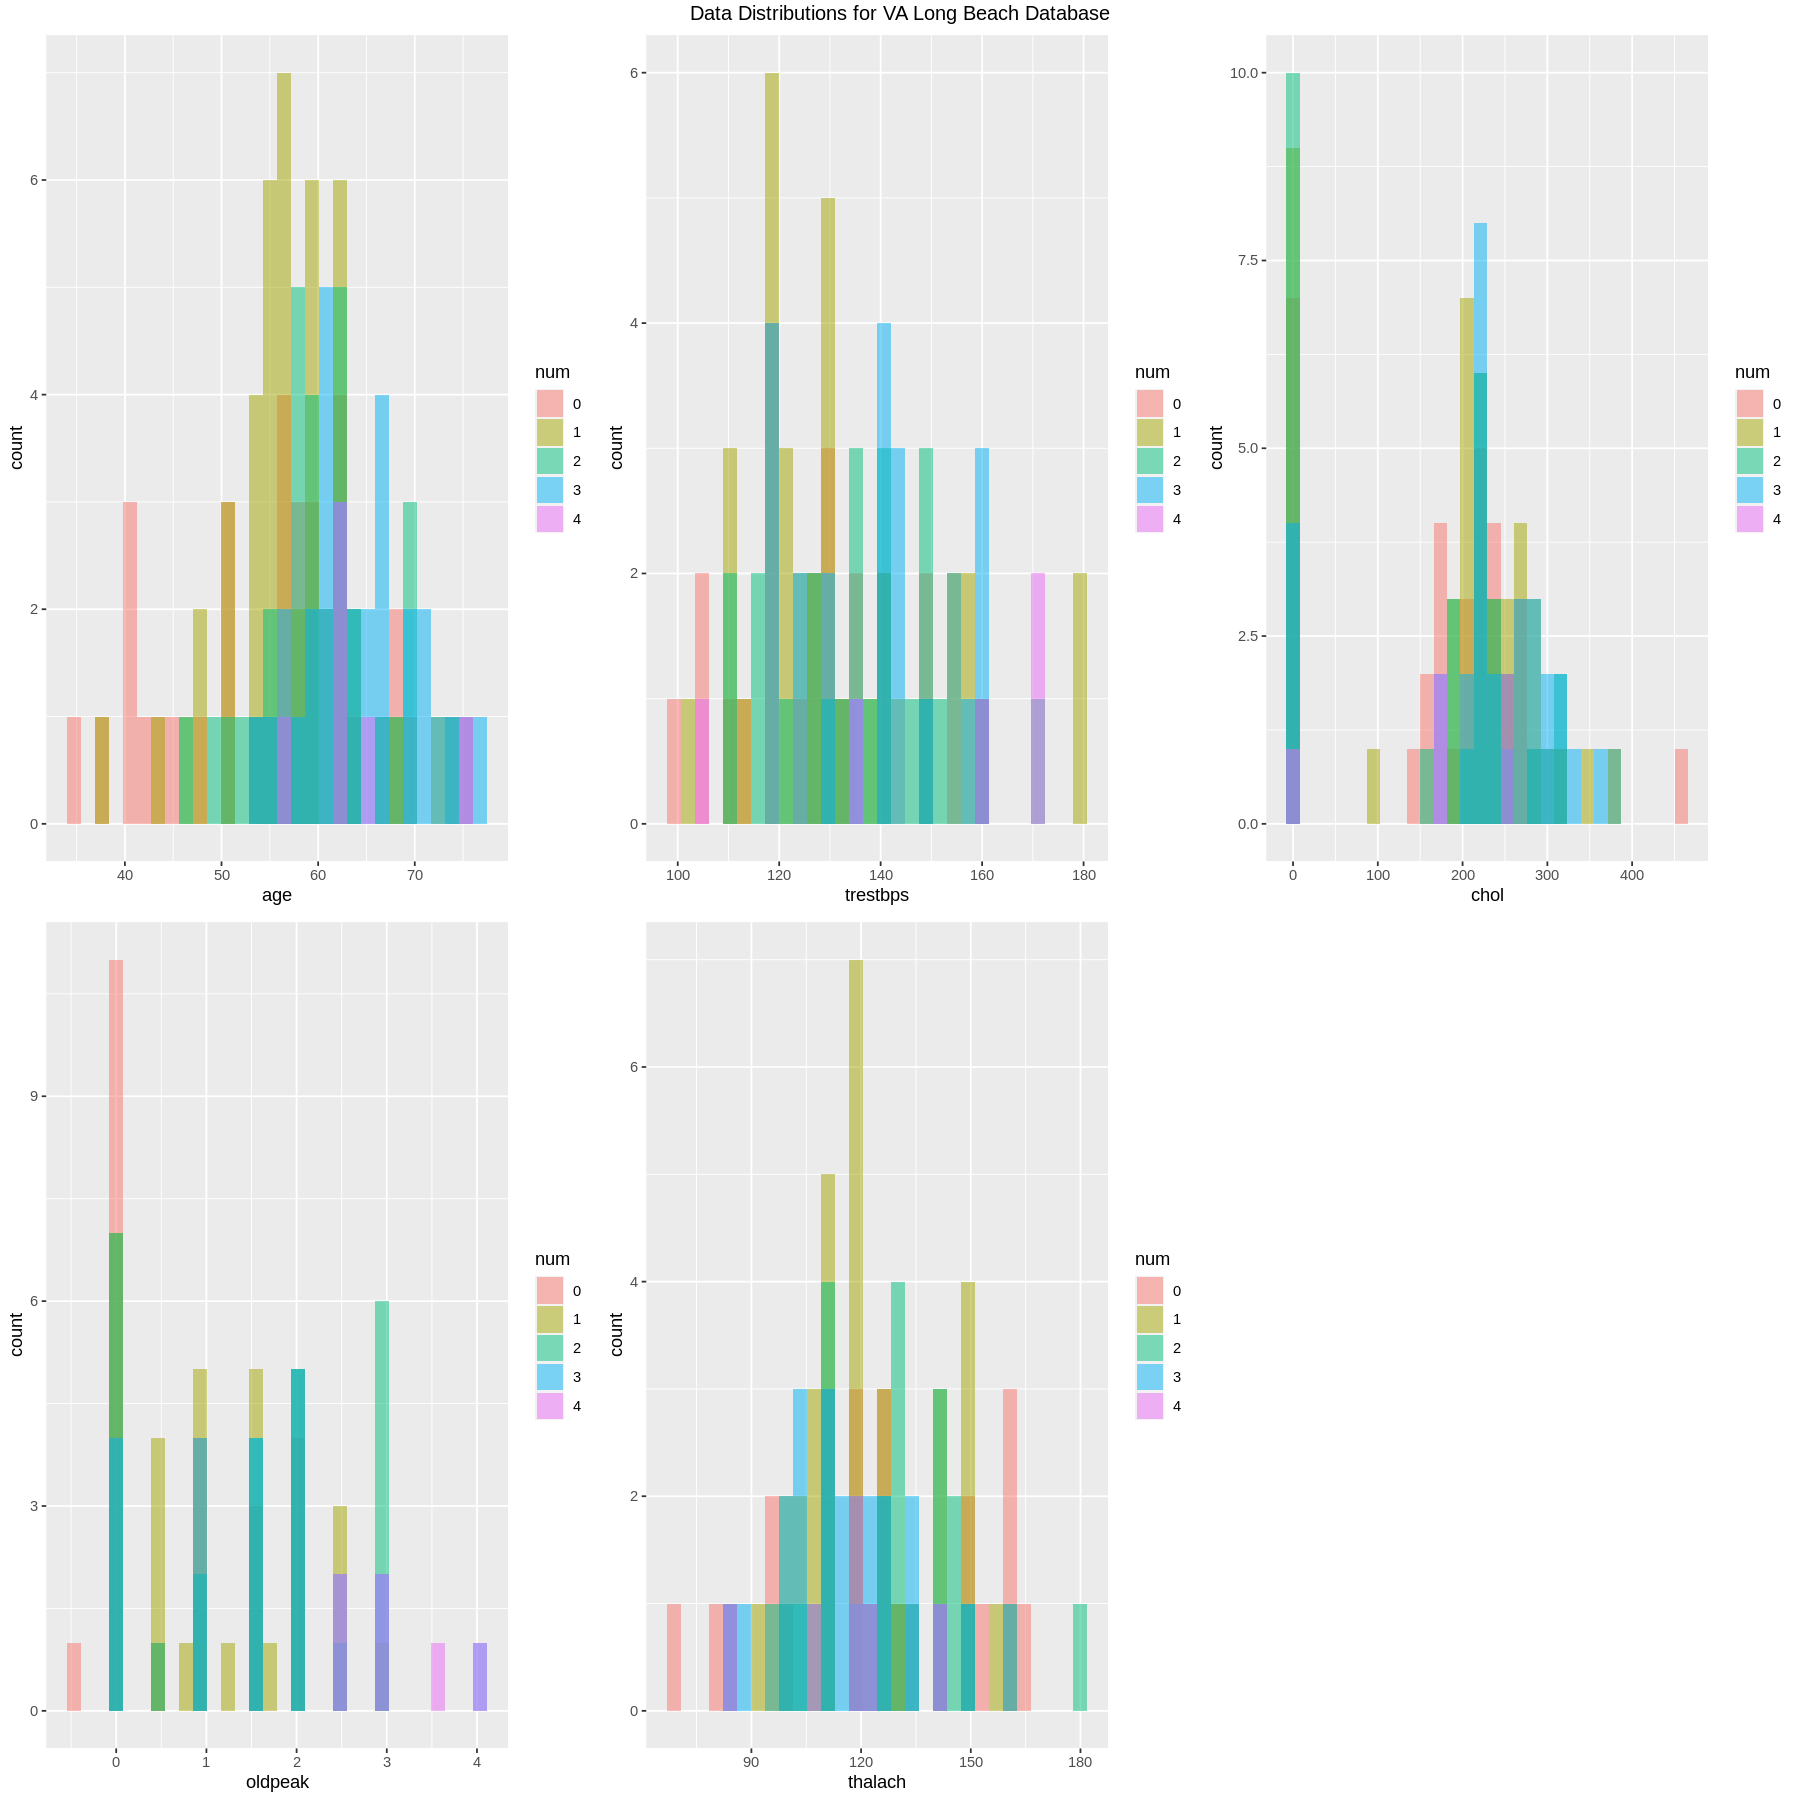

In [185]:
library(gridExtra)
library(RColorBrewer)
options(repr.plot.width=15, repr.plot.height=15)

cleveland_age <- ggplot(cleveland_training, aes(x = age, fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'age', fill = "num") 
     
    
cleveland_trestbps <- ggplot(cleveland_training, aes(x = trestbps,  fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'trestbps', fill = "num")
cleveland_chol <- ggplot(cleveland_training, aes(x = chol,  fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'chol', fill = "num")
cleveland_oldpeak <- ggplot(cleveland_training, aes(x = oldpeak,  fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'oldpeak', fill = "num")
cleveland_thalach <- ggplot(cleveland_training, aes(x = thalach,  fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'thalach', fill = "num")


va_age <- ggplot(va_training, aes(x = age, fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'age',  fill = "num")
va_trestbps <- ggplot(va_training, aes(x = trestbps, fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'trestbps',  fill = "num")
va_chol <- ggplot(va_training, aes(x = chol, fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'chol',  fill = "num")
va_oldpeak <- ggplot(va_training, aes(x = oldpeak, fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'oldpeak',  fill = "num")
va_thalach <- ggplot(va_training, aes(x = thalach, fill = as.factor(num))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'thalach',  fill = "num")



grid.arrange(cleveland_age, cleveland_trestbps, cleveland_chol, cleveland_oldpeak, cleveland_thalach, nrow = 2, top = 'Data Distributions for Cleveland Database')
grid.arrange(va_age, va_trestbps, va_chol, va_oldpeak, va_thalach, nrow = 2, top = 'Data Distributions for VA Long Beach Database')
